In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Descripción y Objetivos

En este análisis se busca comprender a fondo el comportamiento de las transacciones en un restaurante local, utilizando técnicas de estadística aplicada. El objetivo principal es identificar patrones en los montos de las transacciones, la distribución de precios y cantidades, y cómo se comportan las ventas según las diferentes categorías de productos y métodos de pago.

**Preguntas Clave a Responder:**

**Transacciones y Montos Totales:**

* ¿Cuál es el monto promedio, mediana, varianza y desviación estándar de las transacciones?
* ¿Existe una distribución sesgada o simétrica en estos montos?

**Distribución de Precios y Cantidades:**

* ¿Cómo se distribuyen los precios?
* ¿Cómo se distribuyen los montos por transaccion?
* ¿Qué cantidad promedio de items se vende por transacción?

**Análisis por Categoría:**

* ¿Qué producto es el que mas se vende, es bebida o comida?
* ¿Existen diferencias notables en la cantidad de transacciones entre los distintos tipos de artículos?
* ¿Qué tipo de transaccion es la que mas realiza?
* ¿Afecta el horario a las ventas?

**Análisis de Ingresos:**

* ¿Cuál es la categorías y las franjas horarias generan mayores ingresos?
* ¿Cuál es el producto generan mayores ingresos?

## Codigo

### 1. Importamos los datos
Cargamos los datos desde el csv y verificamos que los tipos de datos sean los correctos.

In [20]:
df = pd.read_csv('/content/ventas_cafeteria.csv')

In [31]:
#Realizamos una pequeña exploracion para saber las columnas y el tipo de variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id_pedido          1000 non-null   int64         
 1   fecha              403 non-null    datetime64[ns]
 2   nombre_articulo    1000 non-null   object        
 3   tipo_articulo      1000 non-null   object        
 4   precio_articulo    1000 non-null   int64         
 5   cantidad           1000 non-null   int64         
 6   monto_transaccion  1000 non-null   int64         
 7   tipo_transaccion   893 non-null    object        
 8   recibido_por       1000 non-null   object        
 9   hora_venta         1000 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 78.3+ KB


In [28]:
#Podemos observar que nuestra columna de fecha es variable tipo object, por lo que la convertimos a datetime
df['fecha'] = pd.to_datetime(df['fecha'], errors='coerce')

### 2. Analisis de estadistica descriptiva
Aquí se calcularán medidas estadísticas básicas para las variables numéricas, como la media, mediana, varianza y desviación estándar, enfocándonos especialmente en el monto de las transacciones y en otros indicadores relevantes (precio y cantidad).

El objetivo es obtener un resumen cuantitativo que nos permita entender la tendencia central y la dispersión de los datos, detectar posibles valores atípicos y tener una visión global del comportamiento del dataset.

Para esto lo podemos realizar de dos maneras:

*   Utilizando las formulas de mean, median, var y std
*   Utilizando .describe() lo cual nos simplifica la tarea, pero obtenemos el mismo resultado.

En este caso, vamos a hacer una combinacion de ambos metodos para obtener un mejor entendimiento


In [32]:
print("Estadísticas generales de 'monto_transaccion':")
print(df['monto_transaccion'].describe())
print("Media:", np.mean(df['monto_transaccion']))
print("Mediana:", np.median(df['monto_transaccion']))
print("Varianza:", np.var(df['monto_transaccion']))
print("Desviación estándar:", np.std(df['monto_transaccion']))

print("\nEstadísticas de 'precio_articulo':")
print(df['precio_articulo'].describe())

print("\nEstadísticas de 'cantidad':")
print(df['cantidad'].describe())

Estadísticas generales de 'monto_transaccion':
count    1000.000000
mean      275.230000
std       204.402979
min        20.000000
25%       120.000000
50%       240.000000
75%       360.000000
max       900.000000
Name: monto_transaccion, dtype: float64
Media: 275.23
Mediana: 240.0
Varianza: 41738.79710000015
Desviación estándar: 204.3007515894157

Estadísticas de 'precio_articulo':
count    1000.000000
mean       33.315000
std        14.921744
min        20.000000
25%        20.000000
50%        25.000000
75%        50.000000
max        60.000000
Name: precio_articulo, dtype: float64

Estadísticas de 'cantidad':
count    1000.000000
mean        8.162000
std         4.413075
min         1.000000
25%         4.000000
50%         8.000000
75%        12.000000
max        15.000000
Name: cantidad, dtype: float64


Los resultados muestran que el monto promedio de las transacciones es de 275.23, mientras que la mediana es de 240. Esto significa que, en promedio, las transacciones rondan los 275, pero la mitad de ellas se realizan por un monto inferior a 240. La diferencia entre la media y la mediana sugiere la presencia de una ligera asimetría en la distribución, probablemente con una cola hacia valores altos que elevan la media.

Además, al observar la varianza (41,738.80) y la desviación estándar (204.30), se evidencia una dispersión considerable en los montos de las transacciones. Los valores mínimo y máximo, 20 y 900 respectivamente, refuerzan la idea de que existe una amplia variabilidad en los datos.

### 3. Analisis de distribuciones
En este punto se crearán gráficos como histogramas y boxplots para visualizar la distribución de variables numéricas, por ejemplo, el monto de las transacciones y el precio de los artículos.

El objetivo es obtener una representación visual que complemente las estadísticas descriptivas, permitiendo identificar la forma de la distribución, posibles sesgos y la presencia de outliers de manera inmediata.

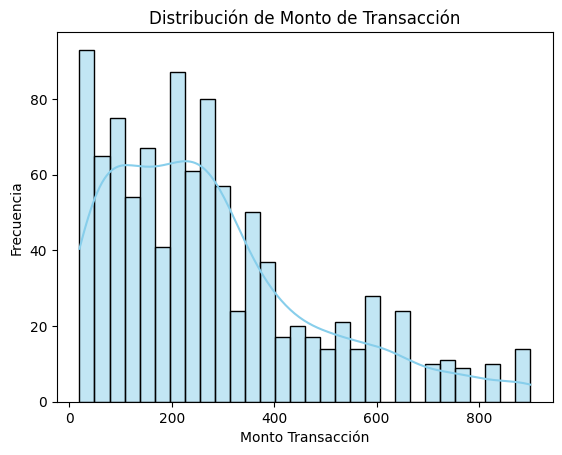

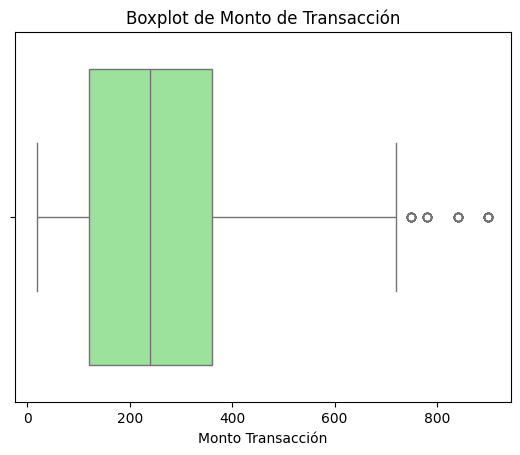

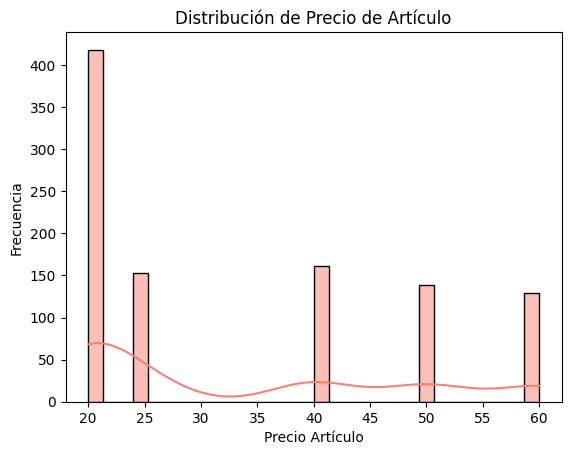

In [33]:
## Histograma y KDE para monto de transacción
plt.figure()
sns.histplot(df['monto_transaccion'], bins=30, kde=True, color='skyblue')
plt.title("Distribución de Monto de Transacción")
plt.xlabel("Monto Transacción")
plt.ylabel("Frecuencia")
plt.show()

## Boxplot para detectar outliers en monto de transacción
plt.figure()
sns.boxplot(x=df['monto_transaccion'], color='lightgreen')
plt.title("Boxplot de Monto de Transacción")
plt.xlabel("Monto Transacción")
plt.show()

## Histograma para precio de artículo
plt.figure()
sns.histplot(df['precio_articulo'], bins=30, kde=True, color='salmon')
plt.title("Distribución de Precio de Artículo")
plt.xlabel("Precio Artículo")
plt.ylabel("Frecuencia")
plt.show()

Los precios muestran una distribución discreta con valores principalmente en 20, 25, 40, 50 y 60. El precio de 20 es el más frecuente, lo que indica que la mayoría de los artículos se ofrecen a un costo bajo. La media de los precios es 33.31, mientras que la mediana es 25, sugiriendo una ligera inclinación hacia valores más altos. El mínimo es 20 y el máximo 60, lo cual confirma que el rango de precios en el menú no es muy amplio, pero sí presenta diferencias notables entre los artículos más económicos y los de mayor costo.


Los montos por transacción exhiben una distribución asimétrica hacia la derecha, con la mayoría de las ventas concentradas en valores bajos y un grupo menor que alcanza montos elevados. La media se sitúa en 275.23, la mediana en 240 y la desviación estándar en torno a 204, reflejando una dispersión significativa. El valor mínimo registrado es 20 y el máximo llega a 900, lo que indica la presencia de algunas transacciones bastante grandes que elevan la media por encima de la mediana.

En promedio, se venden alrededor de 8.16 artículos por transacción, con una mediana de 8. Esto significa que la mitad de las transacciones involucran 8 o menos ítems, mientras que la otra mitad supera esa cifra. El mínimo es 1 y el máximo 15, con una desviación estándar de 4.41, lo que sugiere una variabilidad moderada: la mayoría de las compras se concentran entre 4 y 12 artículos por venta.

### 4. Análisis de Frecuencias por Categorías
Se analizarán las variables categóricas del dataset, como el nombre y tipo de artículo, tipo de transacción, género de quien recibe y hora de venta, mediante gráficos de barras y conteos.

El objetivo es determinar la frecuencia y distribución de cada categoría, lo que nos permitirá identificar qué productos se venden más, cuáles son los métodos de transacción predominantes y en qué franjas horarias se concentran las ventas.

<ipython-input-34-14d5246a17ae>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='nombre_articulo', data=df, order=orden_articulos, palette="viridis")


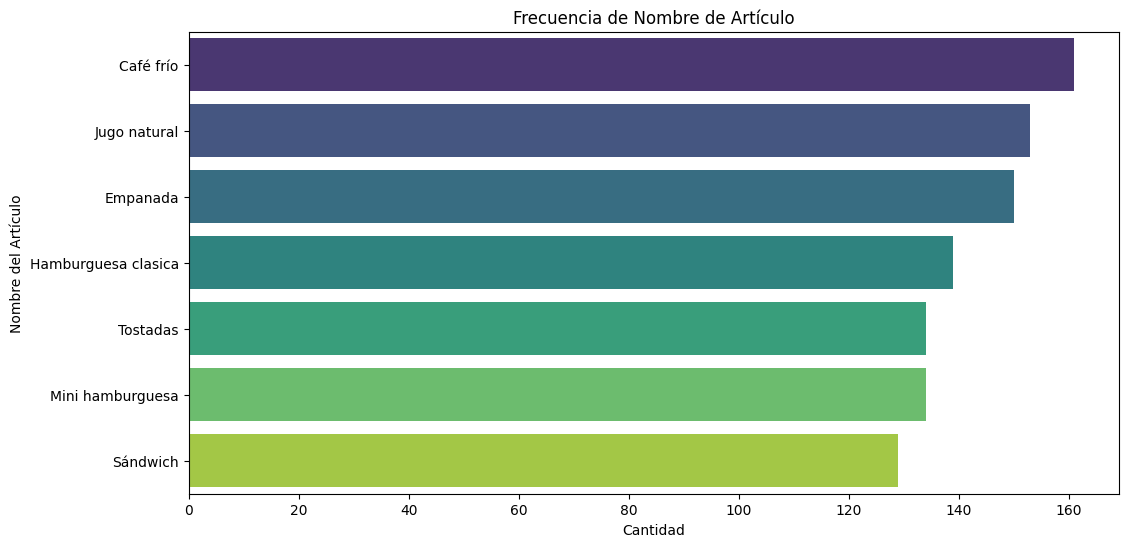

<ipython-input-34-14d5246a17ae>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='tipo_articulo', data=df, palette="pastel")


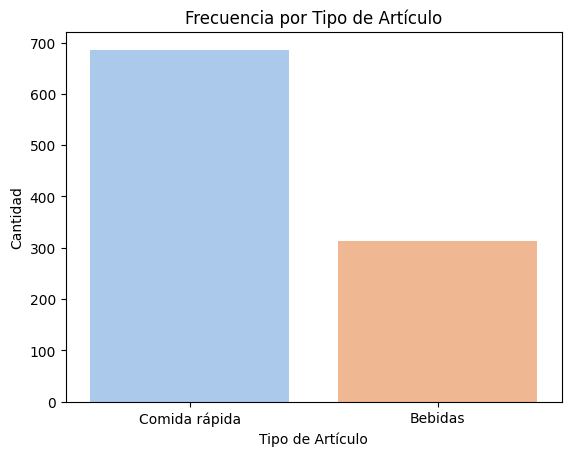

<ipython-input-34-14d5246a17ae>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='tipo_transaccion', data=df, palette="Set2")


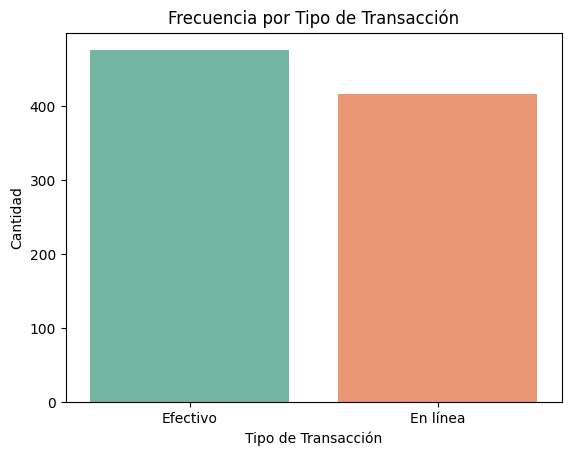

<ipython-input-34-14d5246a17ae>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='recibido_por', data=df, palette="Set3")


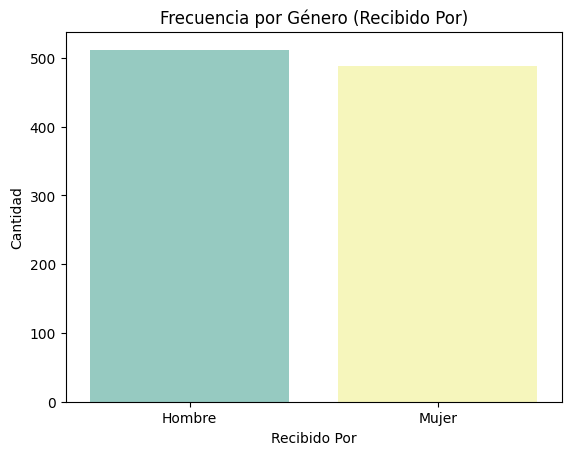

<ipython-input-34-14d5246a17ae>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='hora_venta', data=df, order=orden_horas, palette="coolwarm")


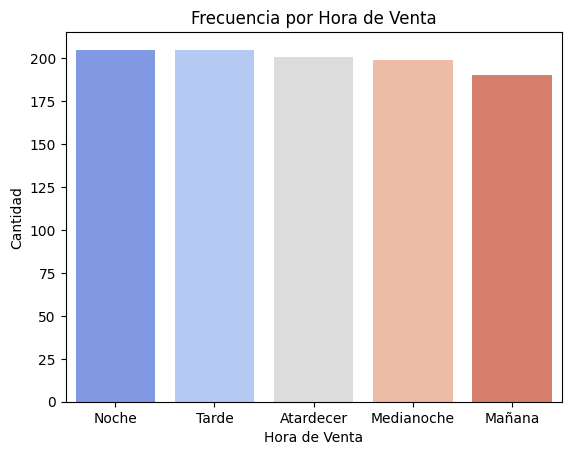

In [34]:
## Frecuencia de nombre de artículo
plt.figure(figsize=(12,6))
orden_articulos = df['nombre_articulo'].value_counts().index
sns.countplot(y='nombre_articulo', data=df, order=orden_articulos, palette="viridis")
plt.title("Frecuencia de Nombre de Artículo")
plt.xlabel("Cantidad")
plt.ylabel("Nombre del Artículo")
plt.show()

## Frecuencia por tipo de artículo
plt.figure()
sns.countplot(x='tipo_articulo', data=df, palette="pastel")
plt.title("Frecuencia por Tipo de Artículo")
plt.xlabel("Tipo de Artículo")
plt.ylabel("Cantidad")
plt.show()

## Frecuencia por tipo de transacción (considera que hay algunos valores nulos)
plt.figure()
sns.countplot(x='tipo_transaccion', data=df, palette="Set2")
plt.title("Frecuencia por Tipo de Transacción")
plt.xlabel("Tipo de Transacción")
plt.ylabel("Cantidad")
plt.show()

## Frecuencia de 'recibido_por' (género)
plt.figure()
sns.countplot(x='recibido_por', data=df, palette="Set3")
plt.title("Frecuencia por Género (Recibido Por)")
plt.xlabel("Recibido Por")
plt.ylabel("Cantidad")
plt.show()

## Frecuencia por hora de venta
plt.figure()
orden_horas = df['hora_venta'].value_counts().index
sns.countplot(x='hora_venta', data=df, order=orden_horas, palette="coolwarm")
plt.title("Frecuencia por Hora de Venta")
plt.xlabel("Hora de Venta")
plt.ylabel("Cantidad")
plt.show()

El producto con mayor frecuencia de venta es el Café frío, que alcanza 161 registros. Esto indica que la bebida más popular supera en número de transacciones a cualquier otro artículo del menú. Sin embargo, al agrupar por categorías, “Comida rápida” muestra un mayor número total de ventas en comparación con “Bebidas”.


La forma de pago en Efectivo registra 476 transacciones, mientras que las ventas En línea (pagos digitales o tarjetas) alcanzan 417. Aunque la diferencia no es muy amplia, el efectivo sigue siendo el método de transacción más común. Cabe señalar que existen algunos datos nulos o faltantes en la columna, pero no cambian significativamente la tendencia general.

Según el gráfico de “Frecuencia por Hora de Venta”, las franjas de Noche y Tarde muestran la mayor cantidad de transacciones, ambas con 205. El resto de horarios (Atardecer, Medianoche y Mañana) se mantienen cerca de los 190-200 registros, lo que indica que, si bien hay cierta preferencia por la Noche y la Tarde, las ventas se distribuyen de forma relativamente uniforme a lo largo del día.

### 5. Análisis Adicional: Comparación de Transacciones según Tipo y Hora de Venta:
Finalmente, se realizará un análisis comparativo agrupando los datos por el tipo de transacción y por la hora de venta, para determinar qué categorías y franjas horarias generan mayores ingresos.

El objetivo es profundizar en la relación entre estas variables y el rendimiento económico del negocio, permitiendo identificar oportunidades para mejorar la eficiencia y la rentabilidad.

<ipython-input-40-20e39911cc19>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='tipo_transaccion', y='monto_transaccion', data=df_tipo_trans, palette="Blues_d")


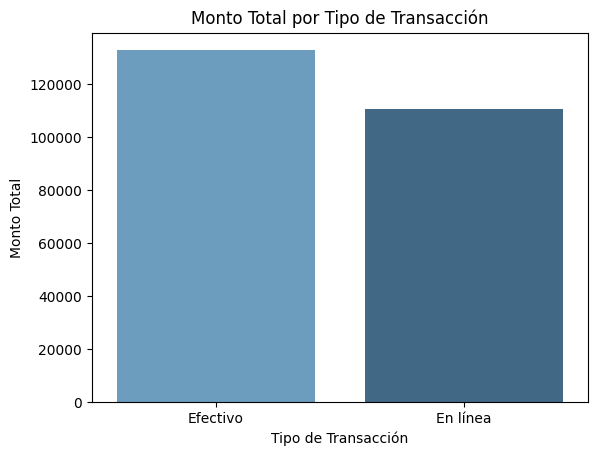

<ipython-input-40-20e39911cc19>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='hora_venta', y='monto_transaccion', data=df_hora, palette="Oranges_d",


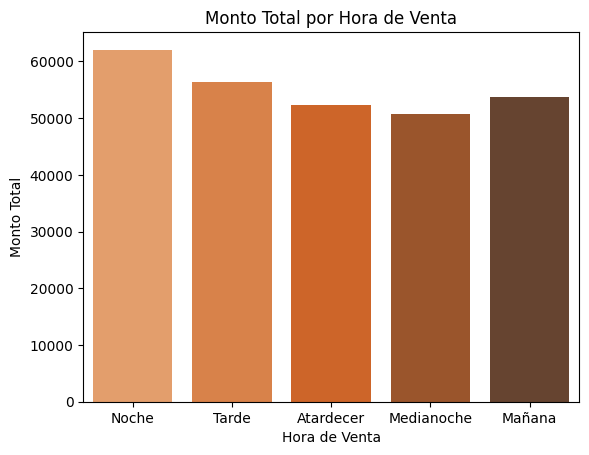

<ipython-input-40-20e39911cc19>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='nombre_articulo', y='monto_transaccion', data=df_nombre, palette="Blues_d")


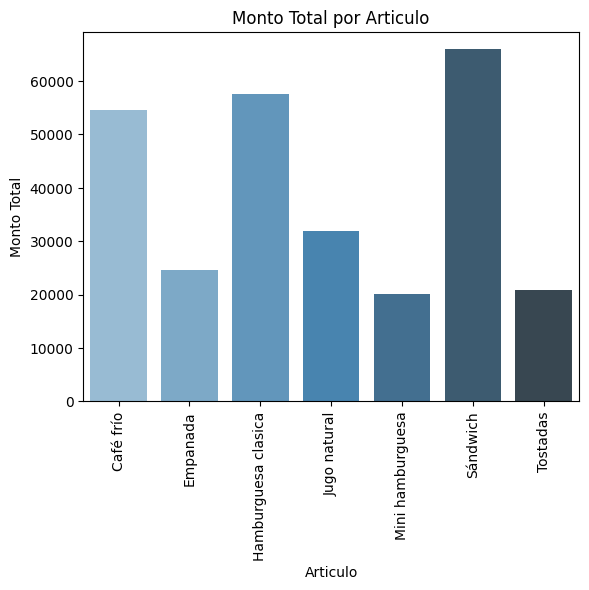

In [40]:
## Monto total por tipo de transacción
df_tipo_trans = df.groupby('tipo_transaccion')['monto_transaccion'].sum().reset_index()
plt.figure()
sns.barplot(x='tipo_transaccion', y='monto_transaccion', data=df_tipo_trans, palette="Blues_d")
plt.title("Monto Total por Tipo de Transacción")
plt.xlabel("Tipo de Transacción")
plt.ylabel("Monto Total")
plt.show()

## Monto total por hora de venta
df_hora = df.groupby('hora_venta')['monto_transaccion'].sum().reset_index()
plt.figure()
sns.barplot(x='hora_venta', y='monto_transaccion', data=df_hora, palette="Oranges_d",
            order=orden_horas)
plt.title("Monto Total por Hora de Venta")
plt.xlabel("Hora de Venta")
plt.ylabel("Monto Total")
plt.show()

## Monto total por producto
df_nombre = df.groupby('nombre_articulo')['monto_transaccion'].sum().reset_index()
plt.figure()
sns.barplot(x='nombre_articulo', y='monto_transaccion', data=df_nombre, palette="Blues_d")
plt.tick_params(axis='x', rotation=90)
plt.title("Monto Total por Articulo")
plt.xlabel("Articulo")
plt.ylabel("Monto Total")
plt.show()

Si consideramos “Comida rápida” versus “Bebidas”, la primera aporta un mayor volumen de ingresos totales. Esto coincide con la alta frecuencia de pedidos y el hecho de que los artículos de comida suelen tener precios y cantidades más elevadas por transacción.

La gráfica de “Monto Total por Hora de Venta” revela que la Noche lidera los ingresos, seguida de cerca por la Tarde y luego el Atardecer. El Medianoche y la Mañana mantienen montos algo menores, pero aún significativos. Estos hallazgos sugieren que la noche es el momento más rentable para el restaurante, probablemente debido a un mayor consumo de comidas fuertes.


De acuerdo con la gráfica de “Monto Total por Artículo”, el Sándwich se destaca como el ítem con la facturación más alta, superando a otras opciones populares como el Café frío o la Hamburguesa clásica. Esto se explica no solo por su frecuencia de venta, sino también por el precio y la cantidad promedio adquirida en cada transacción. Es importante resaltar que, aunque el Café frío sea el producto más frecuente en términos de cantidad de pedidos, el Sándwich logra generar un monto total mayor gracias a un precio más elevado o a compras más grandes por pedido.